# A quick demonstration of alternative plotting package: Seaborn
* Version: 0.11.1
* Reference: 
    1. https://seaborn.pydata.org/index.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.display import Image

%matplotlib inline
%load_ext autoreload

# Different data structure

> Long-form data

In [2]:
flights = sb.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


> Wide-form data

In [3]:
flights_wide = flights.pivot(index="year", columns="month", values="passengers")

In [4]:
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


# Plotting with different data strucutre

In [8]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


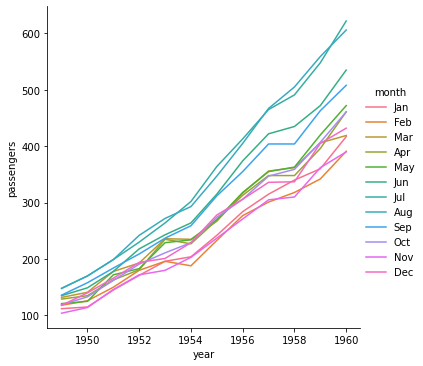

In [5]:
sb.relplot(data=flights, x="year", y="passengers", hue="month", kind="line")

In [9]:
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


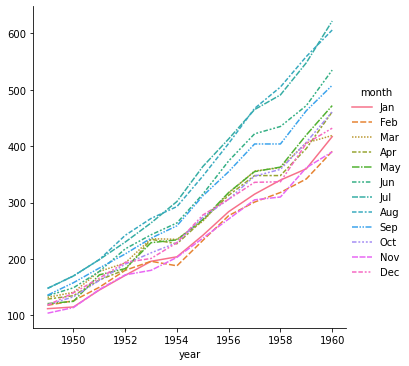

In [6]:
sb.relplot(data=flights_wide, kind="line")

# Figure-level and Axis-level functions
    Figure-level functions also include sb.Facetgrid() that is similar to matplotlib.pyplot.subplots()

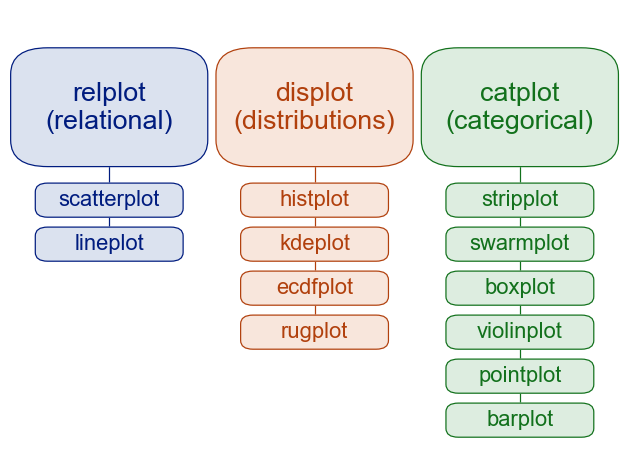

In [52]:
Image("figure level vs axis level.png")

**Note: following demonstration will focus on the long-form data**

# Distribution plot (Univariate)

In [45]:
penguins = sb.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


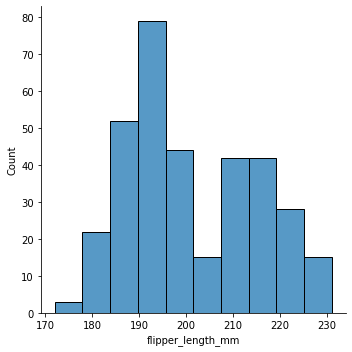

In [13]:
# Useful parametmers: binwidth, bins
sb.displot(data=penguins, x="flipper_length_mm")

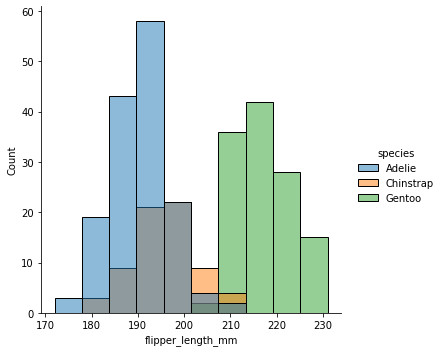

In [15]:
# Conditioning on other variables
sb.displot(penguins, x="flipper_length_mm", hue="species")

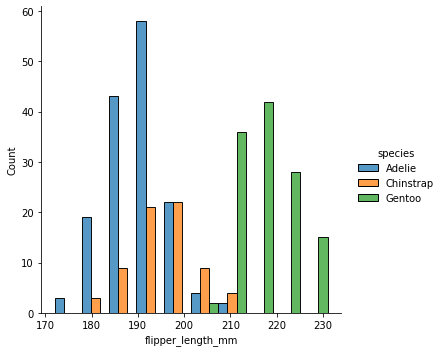

In [17]:
sb.displot(penguins, x="flipper_length_mm", hue="species", multiple="dodge")

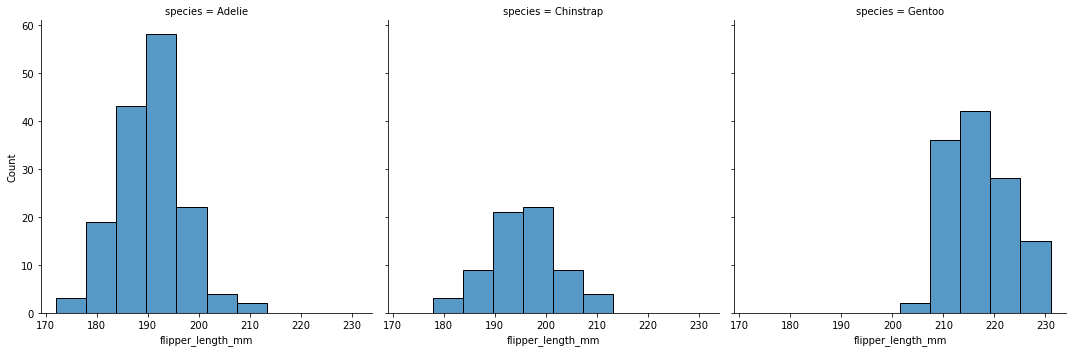

In [19]:
sb.displot(penguins, x="flipper_length_mm", col="species", multiple="dodge")

### kind parameter
    Kernal density estimation (kde) -> sb.displot(kind='kde') -> sb.kdeplot()
    empirical cumulative distribution (edcf) -> sb.displot(kind='ecdf') -> sb.ecdfplot()

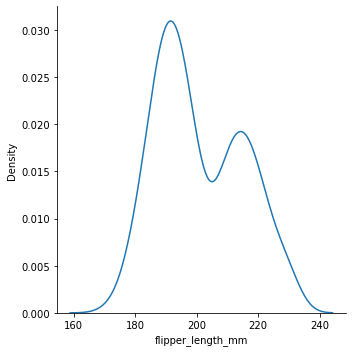

In [20]:
sb.displot(penguins, x="flipper_length_mm", kind="kde")

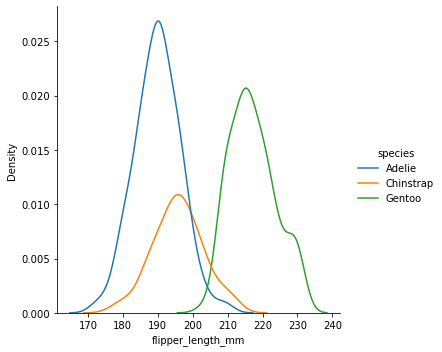

In [21]:
sb.displot(penguins, x="flipper_length_mm", hue="species", kind="kde")

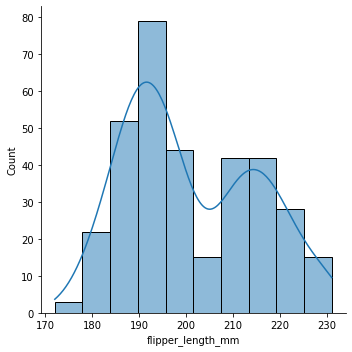

In [22]:
sb.displot(penguins, x="flipper_length_mm", kde=True)

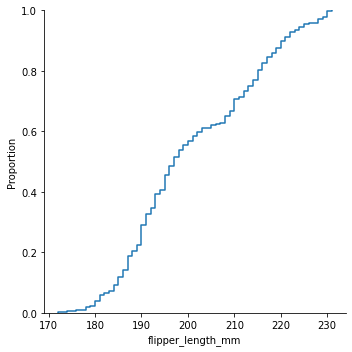

In [23]:
sb.displot(penguins, x="flipper_length_mm", kind="ecdf")

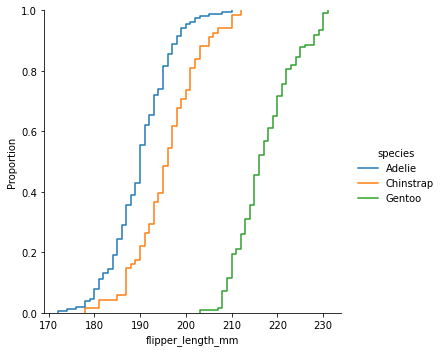

In [24]:
sb.displot(penguins, x="flipper_length_mm", hue="species", kind="ecdf")

# Distribution plot (Bivariate, Continuous variables)

In [26]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


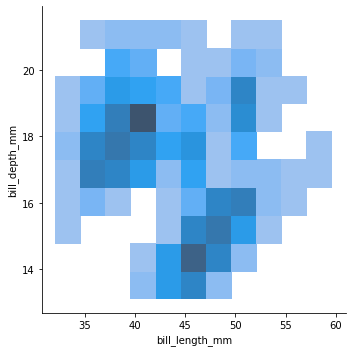

In [25]:
sb.displot(penguins, x="bill_length_mm", y="bill_depth_mm")

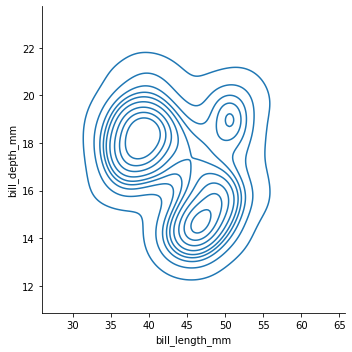

In [27]:
# smoothes the (x, y) observations with a 2D Gaussian
sb.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde")

# Distribution plot (Bivariate, Discrete variables)

In [47]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


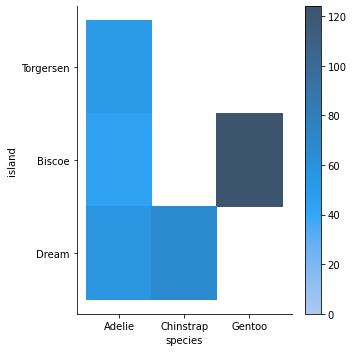

In [53]:
sb.displot(penguins, x="species", y="island", cbar=True)

# sb.joinplot(): distribution plot and scatter plot

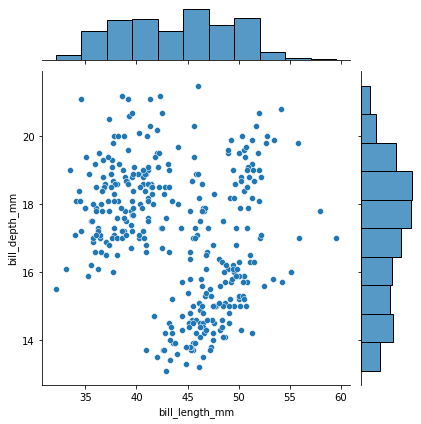

In [48]:
sb.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

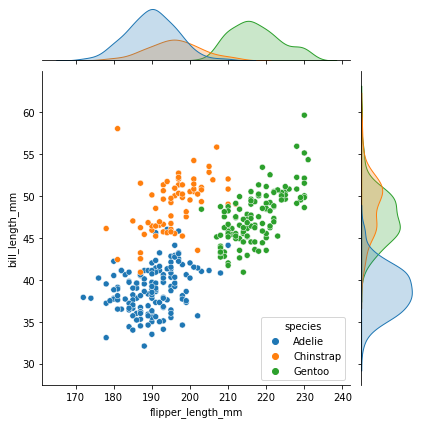

In [55]:
sb.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

# sb.pairplot(): plotting many distributions

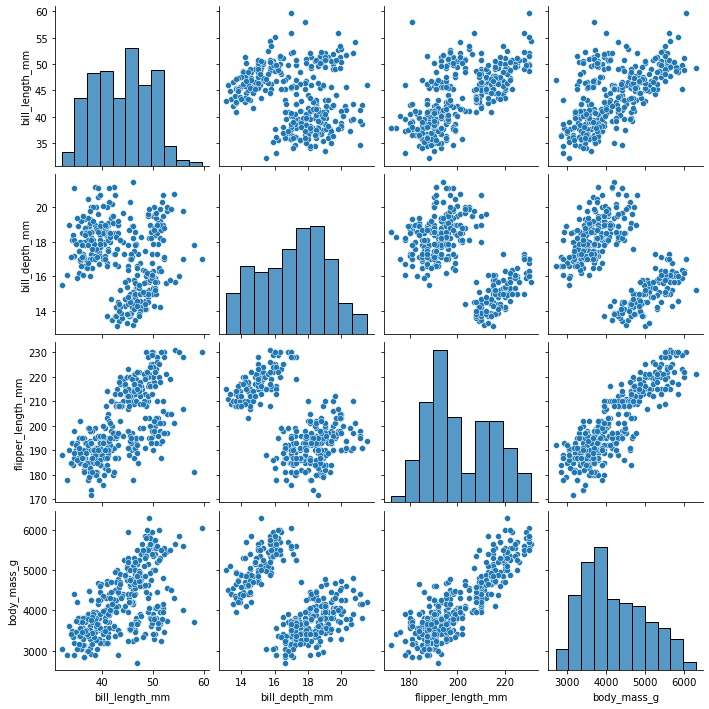

In [50]:
# Useful parameter: kind : {'scatter', 'kde', 'hist', 'reg'}
sb.pairplot(penguins)

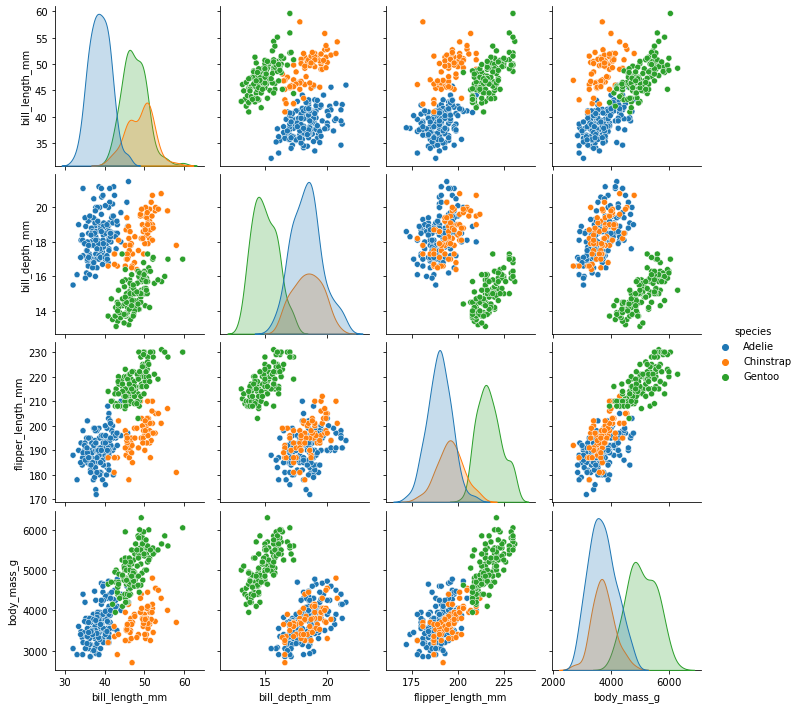

In [54]:
sb.pairplot(penguins, hue="species")